<a href="https://colab.research.google.com/github/anazkhan/GOLD-PRICE-PREDICTION/blob/main/Gold_Price_prediction_with_Linear_Regression_And_Random_Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE REQUIRED LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

**LOADING THE DATASET**

In [ ]:
df=pd.read_csv('/content/gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


**EXPLORATORY DATA ANALYSIS**

In [ ]:
df.shape


(2290, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


* The dataset has 2290 rows and 6 columns.
* Date represents the respective Date of the pricing.
* SPX represents the stock index of US.
* GLD represents the gold price.
* USO represents the US oil price.
* SLV represents the silver price.
* EUR/USD represents the Euro to Dollar Ratio.

In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


* This explains the ststistical measures of the data.

In [ ]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

* we can see that our data is free from missing values.


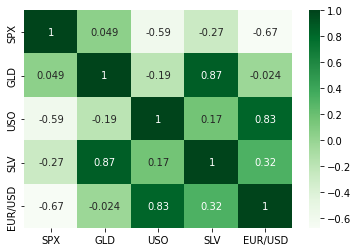

In [ ]:
corr=df.corr() 
sb.heatmap(corr,annot=True,cmap='Greens')

In [ ]:
corr['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

* We can understand that when the US oil price and Euro to Dollar ratio decreases the Gold price tends to increase drastically.
* Also with increase in gold price silver price also increases almost proportionally.

In [ ]:
dt=df.set_index(df['Date'])
dt.drop(['Date'],axis='columns',inplace=True)
dt.head()

,SPX,GLD,USO,SLV,EUR/USD
Date,,,,,
1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


* We set the index of the dataset to Date


**DATA VISUALIZATION**


* LET'S VISUALIZE THE CHANGE IN GOLD PRICE W.R.T EACH FEATURES.

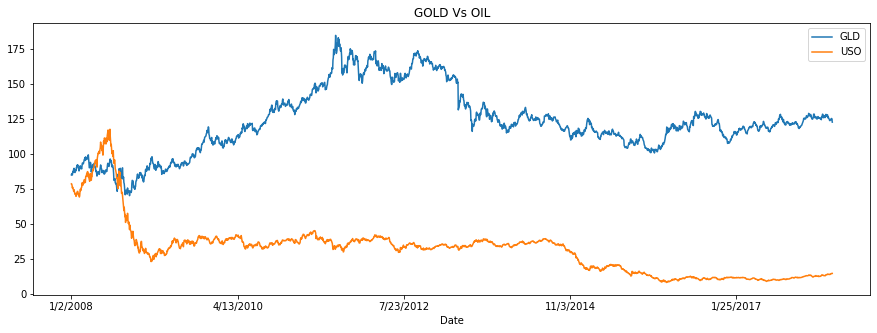

In [ ]:
uso=dt[['GLD','USO']]
uso.plot(kind='line', title='GOLD Vs OIL',figsize=(15,5))

* We can understand that a rise in gold price leads to fall in oil price and vice price.

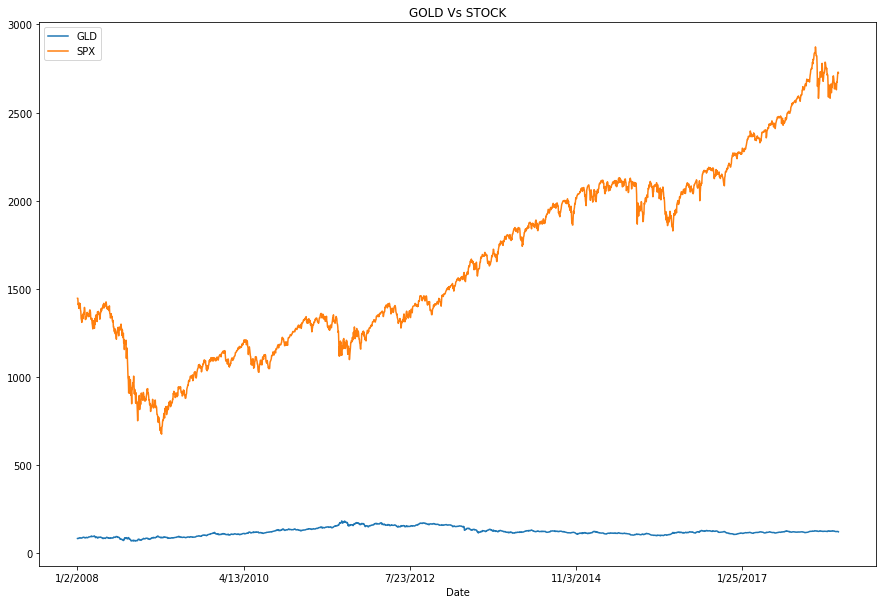

In [ ]:
spx=dt[['GLD','SPX']]
spx.plot(kind='line', title='GOLD Vs STOCK',figsize=(15,10))


* The stock Price fluctuates with change in gold price.
* The stock price tends to rise with rise in gold price.

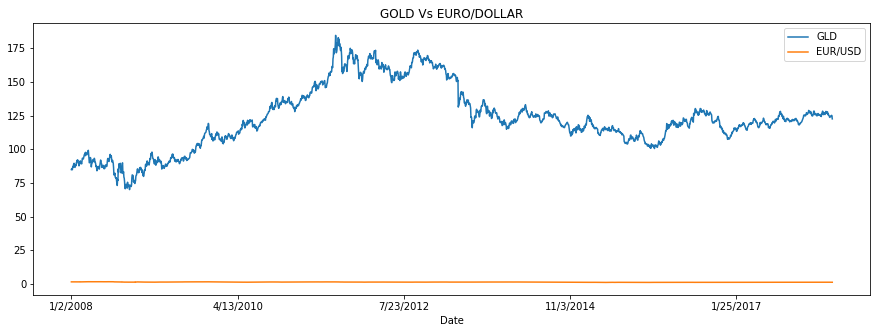

In [ ]:
ed=dt[['GLD','EUR/USD']]
ed.plot(kind='line', title='GOLD Vs EURO/DOLLAR',figsize=(15,5))

* We can see that Euro to Dollar ratio is not much affected with change in gold price.
* we can further infer that Dollar and Euro is correlated ie, both the euro and dollar falls and rise at the same time w.r.t to change in gold price.

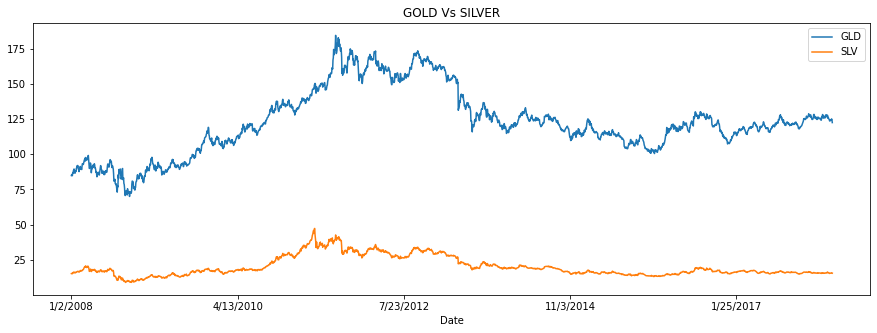

In [ ]:
slv=dt[['GLD','SLV']]
slv.plot(kind='line', title='GOLD Vs SILVER', figsize=(15,5))

* We can see the Gold price is correlated with silver price ie, rise in gold price leads to rise in silver price and vice versa

In [ ]:
largest=df.nlargest(5,['GLD'])
largest

,Date,SPX,GLD,USO,SLV,EUR/USD
795,8/22/2011,1123.819946,184.589996,32.720001,42.630001,1.436101
803,9/6/2011,1165.239990,182.899994,33.590000,41.049999,1.400325
805,9/8/2011,1185.900024,181.809998,34.459999,41.220001,1.390414
800,8/30/2011,1212.920044,179.100006,34.439999,40.400002,1.443314
807,9/13/2011,1172.869995,178.539993,34.849998,39.869999,1.368607


* These represnts the dataset when Gold price was highest during the period.

In [ ]:
smallest=df.nsmallest(5,['GLD'])

* These represnts the dataset when Gold price was Lowest during the period.

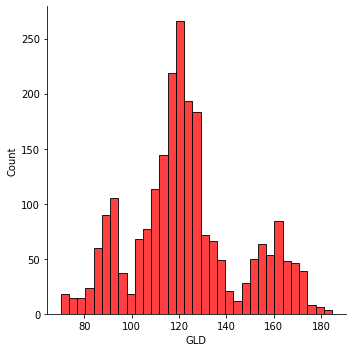

In [ ]:
sb.displot(df['GLD'],color='red')

* We can see that the gold price remained around $120 most of the time during this period.

**TRAIN TEST SPLIT**

In [ ]:
x=df[['SPX','USO','SLV','EUR/USD']]
y=df['GLD']

* x represents the features. 
* y represents the target ie, gold price.

In [ ]:
x.head(2)

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491


In [ ]:
y.head(2)

0    84.860001
1    85.570000
Name: GLD, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape,x_test.shape

((1832, 4), (458, 4))

* We splitted 80% of the data for training and the remaining 20% for testing.

**MODELLING WITH LINEAR REGRESSION**

In [ ]:
model1=LinearRegression()


In [ ]:
model1.fit(x_train,y_train)

LinearRegression()

* We trained our data using LinearRegression Algorithm.

In [ ]:
y_pred1=model1.predict(x_test)

* we are using our linear regression model on predicting the test dataset.

In [ ]:
metrics.r2_score(y_test,y_pred1)

0.874234547012875

* The linear regression model has an accuracy of 87% on the test dataset.

In [ ]:
MAE1=metrics.mean_absolute_error(y_test,y_pred1)
MSE1=metrics.mean_squared_error(y_test,y_pred1)
RMAE1=np.sqrt(metrics.mean_squared_error(y_test,y_pred1))
MAE1 , MSE1 ,RMAE1

(6.069075130024327, 71.04332418258448, 8.428720198380326)

* We can see a high value of mean squared error which is not acceptable for our prediction.
* let's now consider Random forest model and see if it can give a better accuracy. 

In [ ]:
y_testl=list(y_test)

* we converted our y_test into a list so it can avoid error while plotting.

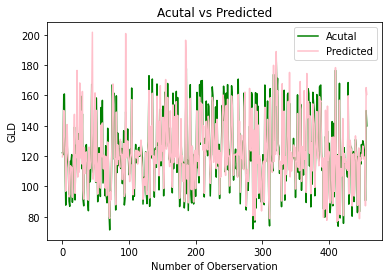

In [ ]:
plt.plot(y_testl, color = 'green', label = 'Acutal')
plt.plot(y_pred1, color = 'pink', label = 'Predicted')
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('GLD')
plt.legend()
plt.show()


* Contionous overlapping occuring at the lows and highs of the price,hence we need more accurate prediction at this ends.
* Now let's try with the RandomForest model.

**MODELLING WITH RANDOM FOREST REGRESSION**

In [ ]:
model2= RandomForestRegressor(n_estimators = 100, random_state = 0)
model2.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

* We trained our data using RandomForest algorithm.

In [ ]:
y_pred2 = model2.predict(x_test)

* we are using our RandomForest model on predicting the test dataset.

In [ ]:
metrics.r2_score(y_test,y_pred2)

0.9934115798342648

* our RandomForest model has an accuracy of 99% which is better than linear regression model.

In [ ]:
MAE2= metrics.mean_absolute_error(y_test,y_pred2)
MSE2= metrics.mean_squared_error(y_test,y_pred2)
RMAE2= np.sqrt(metrics.mean_squared_error(y_test,y_pred2))
MAE2 , MSE2 , RMAE2

(1.2145474815065556, 3.721715769857112, 1.9291748935379374)

* we can see our errors are pretty low and conclude that our model is good enough for prediction.

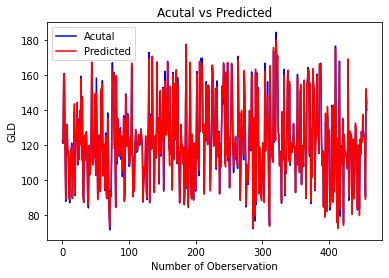

In [ ]:
plt.plot(y_testl, color = 'blue', label = 'Acutal')
plt.plot(y_pred2, color = 'red', label = 'Predicted')
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('GLD')
plt.legend()
plt.show()

* Here, we can barely see the overlapping of blue line ie, the actual price over the red line which is our predicted values. this clearly implies our model is fitting best for the gold price prediction.

**CONCLUSION**

Clearly,The RandomForestRegressor model hav less error than the LinearRegression model hence we can conclude The RandomForest model is best for the Gold price prediction. 